# Usage

This notebook provides the steps to build a network starting from a list of genes, and using the default functionalities of Omniflow.

In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs._db.omnipath import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op

/home/eirini/.cache/pypoetry/virtualenvs/neko-vv6LBICe-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CPU times: user 6.11 s, sys: 501 ms, total: 6.62 s
Wall time: 6.59 s


## 1. Define the list of genes of interest

In [2]:
genes = ["SRC", "NOTCH1", "FAK", "CDH1", "CDH2", "VIM", "MAP4K4", "LATS1", "LATS2", "PTK2B"]

## 2. Create a network using as input the gene set. 

<div class="alert alert-info">

**Note**
    
NB! If no resource is specified, the default used resource by the package is `omnipath.all_interactions()`. To add new resources, please see the [Add resources](https://omniflow-project.readthedocs.io/en/latest/notebooks/add_resources.html#) tutorial. 

</div>  


### 2A. Import genes as network nodes

In [4]:
new_net1 = Network(genes)

In [5]:
#Print node dataframe
new_net1.nodes

,Genesymbol,Uniprot,Type
0,SRC,P12931,NaN
1,NOTCH1,P46531,NaN
2,PTK2,Q05397,NaN
3,CDH1,P12830,NaN
4,CDH2,P19022,NaN
5,VIM,P08670,NaN
6,MAP4K4,O95819,NaN
7,LATS1,O95835,NaN
8,LATS2,Q9NRM7,NaN
9,PTK2B,Q14289,NaN


### 2B. Explore if the nodes are connected without introducing new intermidiate nodes

In [6]:
%%time
new_net1.connect_nodes(only_signed=True, consensus_only=True)

CPU times: user 821 ms, sys: 7.78 ms, total: 828 ms
Wall time: 828 ms


### 2C. Visualize the network with the following command. 

The network picture is also exported in the working repository, in pdf format.

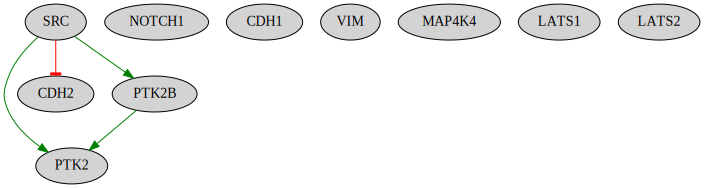

In [7]:
visualizer = NetworkVisualizer(new_net1, color_by='effect')
visualizer.render()

### 2D. Connect disconnected nodes by importing intermediate nodes.

The parameter _*maxlen*_ is used to verify that in the network all the nodes have a distance < than maxlen. 

The parameter _*only_signed*_ forces the algorithm to look for just signed interactions. 

The parameter _*consensus*_ retrieves those interactions with a sign consensus between the references. 

The parameter _*connect_node_when_first_introduced*_, changes the base algorithm, making it look for possible connection between all the disconnected node in the network when a new bridge-gene is introduced in the network.

In [8]:
%%time
new_net1.complete_connection(maxlen=6, k_mean="tight", only_signed=True, connect_node_when_first_introduced=True, consensus=False)

Connecting nodes: 0it [00:00, ?it/s]

Connecting nodes P12931 and P46531
Searching for paths from P46531 to P12931 with length 0
Searching for paths from P46531 to P12931 with length 1
Searching for paths from P46531 to P12931 with length 2
Searching for paths from P46531 to P12931 with length 3
Searching for paths from P12931 to P46531 with length 0
Searching for paths from P12931 to P46531 with length 1
Searching for paths from P12931 to P46531 with length 2


Connecting nodes: 1it [00:04,  4.25s/it]

Connecting nodes P12931 and Q05397
Connecting nodes P12931 and P12830
Searching for paths from P12830 to P12931 with length 0
Searching for paths from P12830 to P12931 with length 1
Searching for paths from P12830 to P12931 with length 2


Connecting nodes: 3it [00:06,  1.79s/it]

Connecting nodes P12931 and P19022
Searching for paths from P19022 to P12931 with length 0
Searching for paths from P19022 to P12931 with length 1
Searching for paths from P19022 to P12931 with length 2
Searching for paths from P19022 to P12931 with length 3


Connecting nodes: 4it [00:08,  2.05s/it]

Connecting nodes P12931 and P08670
Searching for paths from P08670 to P12931 with length 0
Searching for paths from P08670 to P12931 with length 1
Searching for paths from P08670 to P12931 with length 2
Searching for paths from P12931 to P08670 with length 0
Searching for paths from P12931 to P08670 with length 1
Searching for paths from P12931 to P08670 with length 2


Connecting nodes: 5it [00:16,  4.09s/it]

Connecting nodes P12931 and O95819
Searching for paths from O95819 to P12931 with length 0
Searching for paths from O95819 to P12931 with length 1
Searching for paths from O95819 to P12931 with length 2
Searching for paths from O95819 to P12931 with length 3
Searching for paths from P12931 to O95819 with length 0
Searching for paths from P12931 to O95819 with length 1
Searching for paths from P12931 to O95819 with length 2
Searching for paths from P12931 to O95819 with length 3


Connecting nodes: 6it [01:08, 19.40s/it]

Connecting nodes P12931 and O95835
Searching for paths from O95835 to P12931 with length 0
Searching for paths from O95835 to P12931 with length 1
Searching for paths from O95835 to P12931 with length 2
Searching for paths from O95835 to P12931 with length 3


Connecting nodes: 7it [01:09, 13.53s/it]

Connecting nodes P12931 and Q9NRM7
Searching for paths from Q9NRM7 to P12931 with length 0
Searching for paths from Q9NRM7 to P12931 with length 1
Searching for paths from Q9NRM7 to P12931 with length 2


Connecting nodes: 8it [01:18, 12.17s/it]

Connecting nodes P12931 and Q14289
Connecting nodes P46531 and Q05397
Searching for paths from P46531 to Q05397 with length 0
Searching for paths from P46531 to Q05397 with length 1
Searching for paths from P46531 to Q05397 with length 2
Searching for paths from P46531 to Q05397 with length 3


Connecting nodes: 13it [01:30,  4.57s/it]

Connecting nodes P46531 and P12830
Connecting nodes P46531 and P19022
Connecting nodes P46531 and P08670
Connecting nodes P46531 and O95819


Connecting nodes: 14it [01:30,  3.72s/it]

Connecting nodes P46531 and O95835
Searching for paths from O95835 to P46531 with length 0
Searching for paths from O95835 to P46531 with length 1
Searching for paths from O95835 to P46531 with length 2
Searching for paths from O95835 to P46531 with length 3


Connecting nodes: 19it [01:43,  2.60s/it]

Connecting nodes P46531 and Q9NRM7
Connecting nodes P46531 and Q14289
Connecting nodes Q05397 and P12830
Connecting nodes Q05397 and P19022
Connecting nodes Q05397 and P08670
Connecting nodes Q05397 and O95819
Connecting nodes Q05397 and O95835


Connecting nodes: 26it [01:44,  1.02s/it]

Connecting nodes Q05397 and Q9NRM7
Connecting nodes Q05397 and Q14289
Connecting nodes P12830 and P19022
Connecting nodes P12830 and P08670
Connecting nodes P12830 and O95819
Connecting nodes P12830 and O95835
Searching for paths from O95835 to P12830 with length 0
Searching for paths from O95835 to P12830 with length 1
Searching for paths from O95835 to P12830 with length 2
Searching for paths from O95835 to P12830 with length 3


Connecting nodes: 32it [01:45,  1.85it/s]

Connecting nodes P12830 and Q9NRM7
Connecting nodes P12830 and Q14289
Connecting nodes P19022 and P08670
Connecting nodes P19022 and O95819
Connecting nodes P19022 and O95835
Searching for paths from O95835 to P19022 with length 0
Searching for paths from O95835 to P19022 with length 1
Searching for paths from O95835 to P19022 with length 2
Searching for paths from O95835 to P19022 with length 3


Connecting nodes: 34it [01:45,  2.15it/s]

Connecting nodes P19022 and Q9NRM7
Connecting nodes P19022 and Q14289
Connecting nodes P08670 and O95819
Connecting nodes P08670 and O95835
Searching for paths from O95835 to P08670 with length 0
Searching for paths from O95835 to P08670 with length 1
Searching for paths from O95835 to P08670 with length 2
Searching for paths from O95835 to P08670 with length 3


Connecting nodes: 37it [01:46,  2.67it/s]

Connecting nodes P08670 and Q9NRM7
Connecting nodes P08670 and Q14289
Connecting nodes O95819 and O95835
Searching for paths from O95835 to O95819 with length 0
Searching for paths from O95835 to O95819 with length 1


Connecting nodes: 40it [01:46,  3.33it/s]

Searching for paths from O95835 to O95819 with length 2
Searching for paths from O95835 to O95819 with length 3
Connecting nodes O95819 and Q9NRM7


Connecting nodes: 42it [01:46,  4.10it/s]

Connecting nodes O95819 and Q14289
Connecting nodes O95835 and Q9NRM7
Connecting nodes O95835 and Q14289
Searching for paths from O95835 to Q14289 with length 0
Searching for paths from O95835 to Q14289 with length 1
Searching for paths from O95835 to Q14289 with length 2
Searching for paths from O95835 to Q14289 with length 3


Connecting nodes: 45it [01:47,  2.39s/it]

Connecting nodes Q9NRM7 and Q14289
CPU times: user 1min 47s, sys: 85.6 ms, total: 1min 47s
Wall time: 1min 47s


## 3. Visualize final network

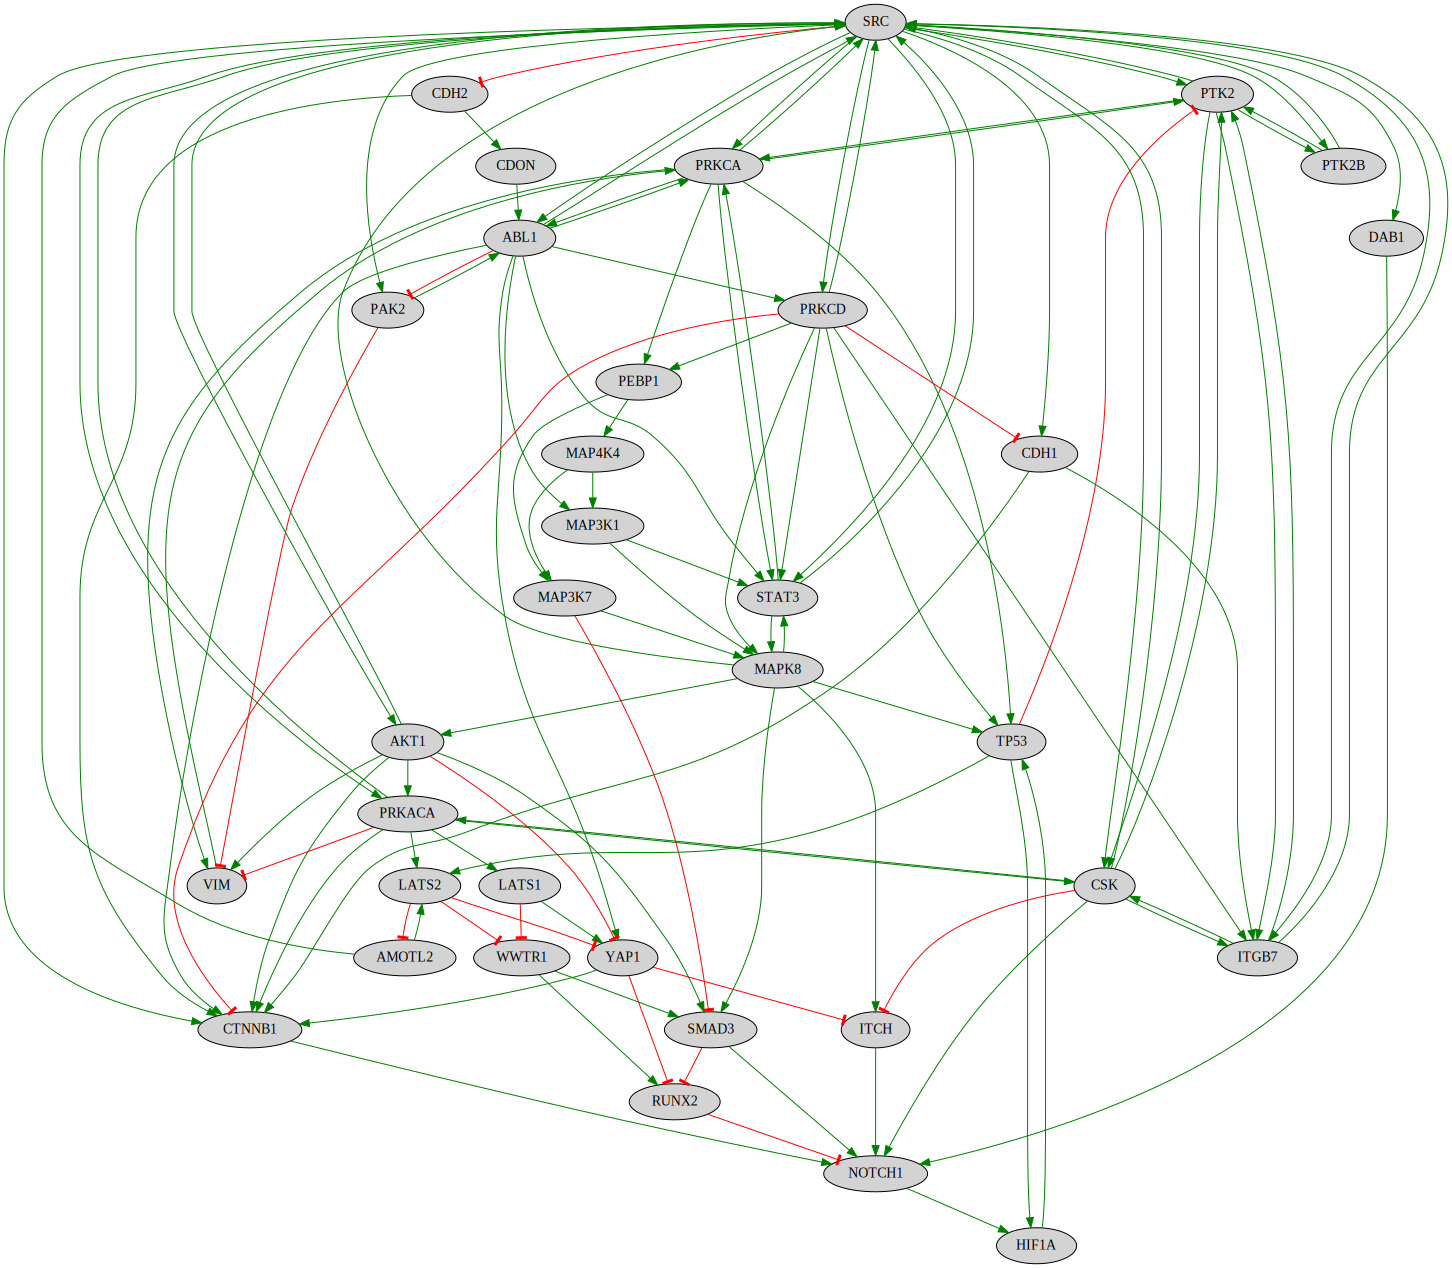

In [9]:
#Visualize a specific nodes and 
visualizer1 = NetworkVisualizer(new_net1,color_by='effect')
visualizer1.render(output_file='network2')

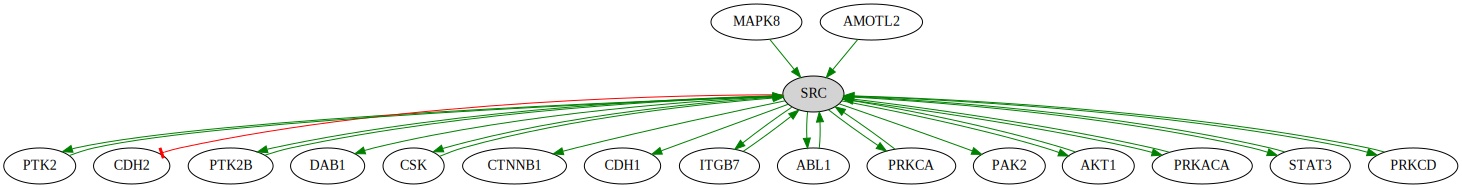

In [10]:
#Visualize a specific nodes and 
visualizer1 = NetworkVisualizer(new_net1, predefined_node = "SRC",color_by='effect')
visualizer1.render(output_file='network2')

In [11]:
#We can access to the edges of the network
new_net1.edges

,source,target,Type,Effect,References
6821,P12931,Q05397,None,stimulation,Adhesome:10085298;Adhesome:10592173;Adhesome:1...
32968,P12931,P19022,None,inhibition,ACSN:15782139;ACSN:16371504;ACSN:16492141;ACSN...
5154,P12931,Q14289,None,stimulation,Adhesome:10329689;Adhesome:10521452;Adhesome:1...
44795,Q14289,Q05397,None,stimulation,Adhesome:16760434;HPRD:16760434;KEA:12960434;K...
38417,P12931,O75553,None,stimulation,HPRD-phos:10959835;HPRD-phos:11279201;HPRD:109...
...,...,...,...,...,...
63003,P31749,P46937,None,inhibition,HPRD:12535517;KEA:12535517;PhosphoSite:1253551...
2876,P45983,P84022,None,stimulation,HPRD:10601313;ProtMapper:25714018;SPIKE:106013...
2813,P45983,Q96J02,None,stimulation,ACSN:16469705;KEA:16446428;ProtMapper:16446428...
78856,O43318,P84022,None,inhibition,HPRD:9380693;KEA:9380693;iPTMnet:9380693
